<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/M%C3%A9todo%20de%20Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [73]:
x = sp.symbols('x')             # introducimos una variable
u = sp.Function('u')            # esto es una funcion

Para resolver la ecuacion exacta del problema de valor inicial

In [74]:
ode = u(x).diff(x, x) + u(x) - x     # u'' + u = x  <=>  u'' + u - x = 0
sp.dsolve(ode, u(x))                 # solucion general

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [75]:
sol = sp.dsolve(
    ode,
    ics={ u(0): 0, sp.diff(u(x), x).subs(x, 0): 2 }
)   # diccionario de condiciones iniciales

sol

Eq(u(x), x + sin(x))

In [76]:
u_expr = sol.rhs
u_num  = sp.lambdify(x, u_expr, "numpy")

In [77]:
xx = np.linspace(0, 1, 100)      # crea un array de numeros equiespaciados
yy = u_num(xx)

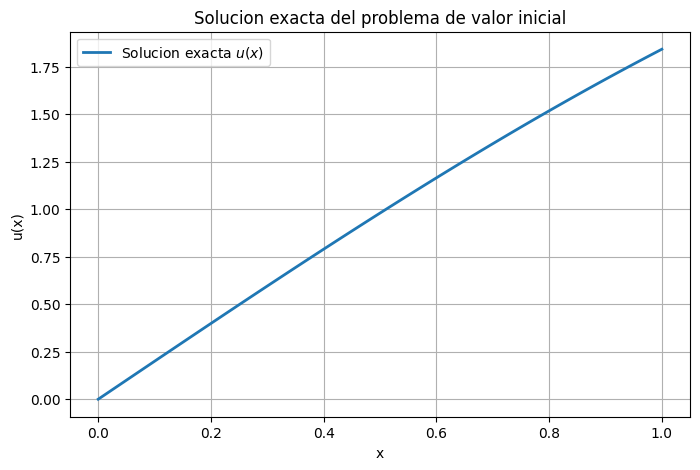

In [64]:
plt.figure(figsize=(8, 5))                               # nueva figura
plt.plot(xx, yy, label="Solucion exacta $u(x)$", linewidth=2)
plt.title('Solucion exacta del problema de valor inicial')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid()
plt.legend()
plt.show()

Ahora usamos el metodo de colocacion con un polinomio cubico

In [65]:
a, b = sp.symbols('a b')    # estos seran a2 y a3

# u_N(x) = 0 + 2x + a x^2 + b x^3
u_n = 2*x + a*x**2 + b*x**3    # polinomio cubico aproximado
u_n

a*x**2 + b*x**3 + 2*x

In [66]:
u_n_2 = sp.diff(u_n, x, 2)
F = u_n_2 + u_n - x    # esta es epsilon(x)
F

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [67]:
# puntos de colocacion
points = [sp.Rational(1, 2), 1]   # x = 1/2 y x = 1
points

[1/2, 1]

In [82]:
eqs = [sp.Eq(F.subs(x, p), 0) for p in points]
sol_ab = sp.solve(eqs, [a, b])

for eq in eqs:
    print(eq)

print("Sistema de ecuaciones simbolico:")
for eq in eqs:
    sp.pprint(eq)

sol_ab

Eq(9*a/4 + 25*b/8 + 1/2, 0)
Eq(3*a + 7*b + 1, 0)
Sistema de ecuaciones simbolico:
9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


{a: -1/17, b: -2/17}

In [83]:
# Sustituir en la funcion de prueba
u_approx = u_n.subs(sol_ab)
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [84]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

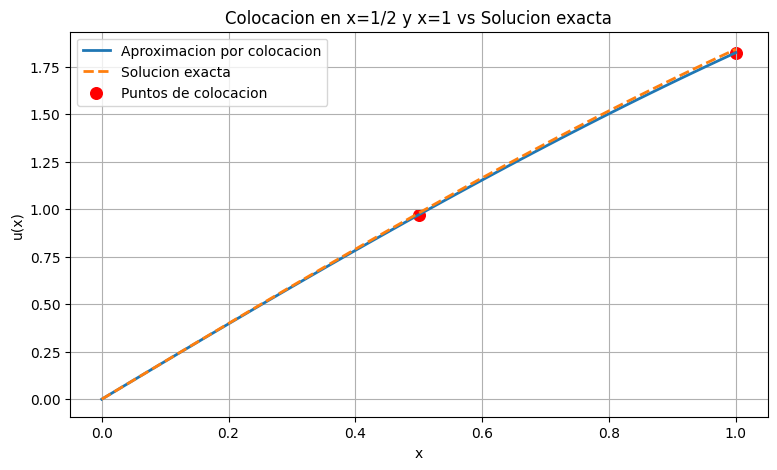

In [88]:
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximacion por colocacion", linewidth=2)
plt.plot(xx, u_num(xx), "--", label="Solucion exacta", linewidth=2)

# puntos de colocacion
plt.scatter(
    [0.5, 1.0],
    u_approx_fn(np.array([0.5, 1.0])),
    color="red",
    s=70,
    label="Puntos de colocacion"
)

plt.title("Colocacion en x=1/2 y x=1 vs Solucion exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()